# **Assignment1-NLP**

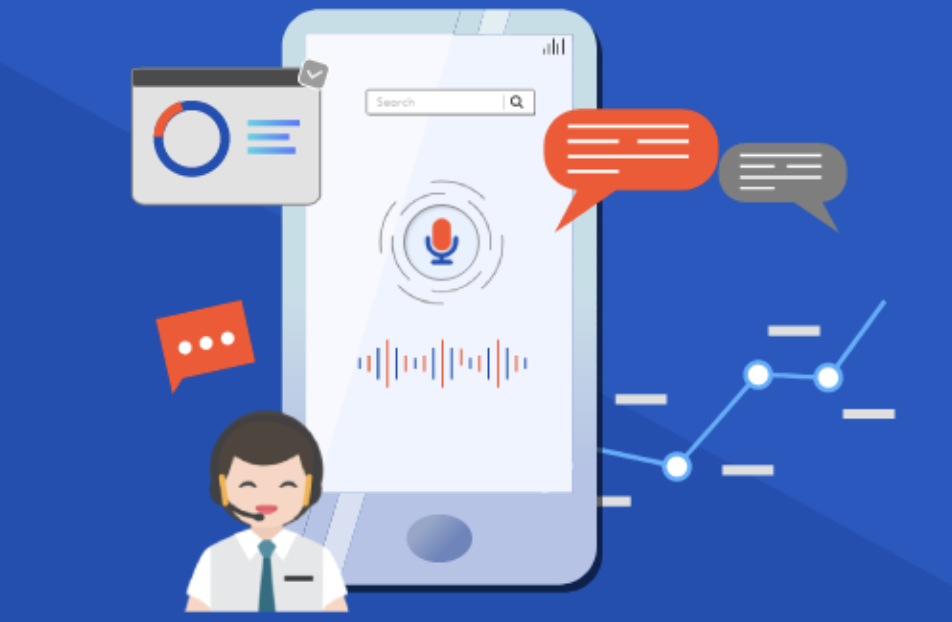

# **Automatic Speech Recognition**

Speech Recognition, also known as Automatic Speech Recognition (ASR), is a technology that converts spoken language into written text. It plays a crucial role in bridging the gap between human speech and computer understanding, enabling applications like virtual assistants, real-time transcription, and voice-controlled systems. ASR systems typically process audio signals by extracting features such as spectrograms, then using Artificial Intelligence-based model sto decode these signals into meaningful word sequences. In the context of natural language processing (NLP), ASR provides the first step in enabling machines to understand and respond to spoken language.

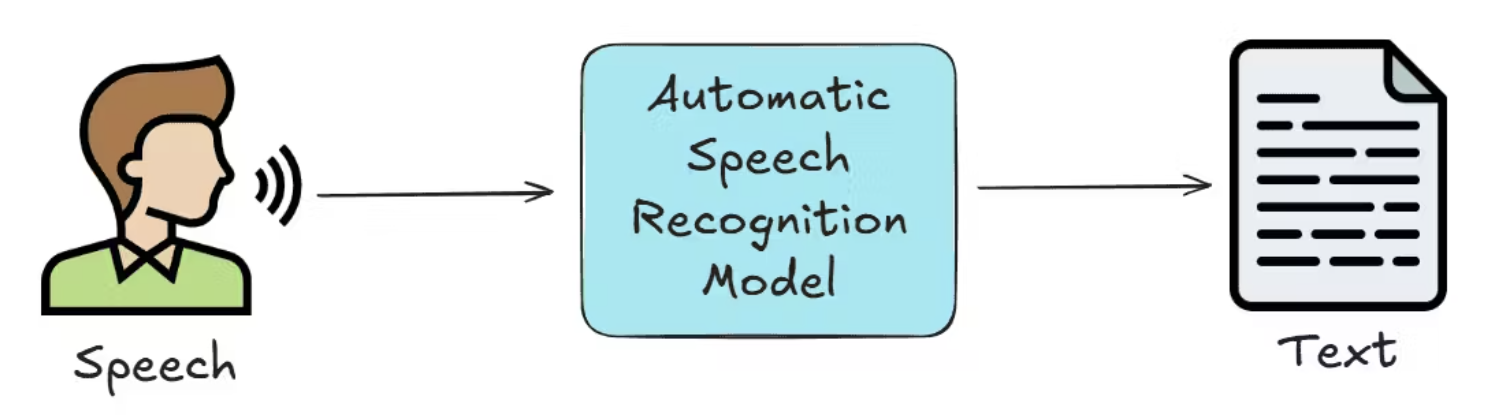

# **Dataset**

LibriSpeech is a widely used speech recognition dataset designed for training and evaluating automatic speech recognition (ASR) systems. It was introduced by Vassil Panayotov et al. in 2015 and has since become one of the standard benchmarks in the ASR research community.

LibriSpeech is a publicly available speech recognition dataset consisting of approximately 1,000 hours of English speech derived from audiobooks that are part of the LibriVox project. It was created to support training and evaluation of automatic speech recognition (ASR) systems. The audio is sampled at 16 kHz and is accompanied by accurate, time-aligned transcripts. LibriSpeech includes multiple subsets such as "train-clean," "train-other," "dev-clean," and "test-clean," allowing researchers to benchmark models under varying levels of audio quality and complexity. Its accessibility, size, and quality have made it one of the most widely used datasets in speech and NLP research.

***Note on Dataset Usage:***

The corresponding dataset used in this assignment is a subset of the LibriSpeech corpus and has been specifically selected and uploaded on Canvas. To ensure consistency in evaluation and reproducibility, you must not use any external data or download additional LibriSpeech files. Only use the audio and transcript files provided in the assignment folder on Canvas.



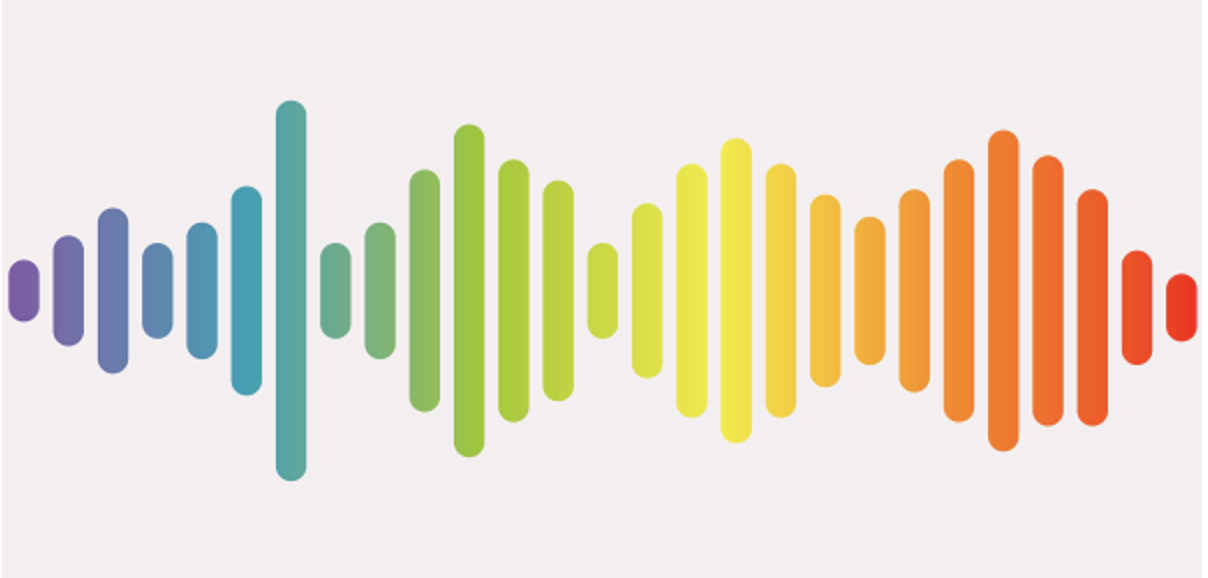

# **Step-by-Step Guide: From Audio to Clean Text**

# **Step 1: Read the Audio Files**

Assume the corresponding dataset includes:

*   Several .flac audio files (e.g., 84-121123-0000.flac)
*   A transcript file (e.g., transcripts.txt)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
# Install required packages (run only if not already installed)
!pip install librosa pydub matplotlib openai-whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.5/800.5 kB 9.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.7/155.7 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 58.5 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20240930-py3-none-any.whl size=803404 sha256=633373a9b255cfa5a8df62bb734b67e49034dca31c64b9eb55aa09e9da00e48d
  Stored in directory: /root/.cache/pip/wheels/2f/f2/ce/6eb23db4091d026238ce76703bd66da60b969d70bcc81d5d3a
Successfully built openai-whisper


**Question 1:** Using Whisper, load Audio and Transcribe.
In addition, can you  answer the following questions:

*   What is the sampling rate of the provided audio files, and why is it important for speech recognition?
*   What is the duration of each audio file?
*   What is the bit depth of the audio files, and how does it affect the quality of speech recognition?
*  What is the file size of each audio file, and how might the size relate to audio quality or length?
*   For each audio, plot it over time.
*   List item



For every question, be sure to anlayze and discuss your response.

Note: For answering this questions, python coding is needed. You can use libraries, such as librosa, or pydub.
For more information, please refer to:

**Librosa**: https://librosa.org/doc/latest/index.html

**pydub:** https://github.com/jiaaro/pydub


You can refer to tutorials at:

https://youtu.be/B31RiiRt_TE?si=76VKAir9xwG8hH2V

https://youtu.be/vJ_WL9aYfNI?si=Hx8OFbHfqJn07uQa

In [49]:
# Step 1: Load Audio and Transcribe using Whisper
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from pydub import AudioSegment
import whisper
import numpy as np
from IPython.display import Audio, display

import warnings
warnings.filterwarnings("ignore")

In [50]:
# Set path to audio directory and transcript file
audio_dir = "/content/drive/MyDrive/ASR-Project/audio"
transcript_path = "/content/drive/MyDrive/ASR-Project/121-127105.trans.txt"

In [51]:
# Load Whisper model (use 'base' for speed, 'small'/'medium' for better accuracy)
model = whisper.load_model("base")

100%|███████████████████████████████████████| 139M/139M [00:02<00:00, 54.3MiB/s]


In [52]:
# Helper function to extract audio metadata and plot waveform
def analyze_audio(file_path):
    print(f"\nAnalyzing: {os.path.basename(file_path)}")

    # Load audio using librosa
    audio, sr = librosa.load(file_path, sr=None)  # sr=None to preserve original sampling rate
    duration = librosa.get_duration(y=audio, sr=sr)
    bit_depth = AudioSegment.from_file(file_path).sample_width * 8
    file_size = os.path.getsize(file_path) / (1024 ** 2)  # in MB

    # Display audio
    display(Audio(file_path))

    # Print details
    print(f"Sampling Rate: {sr} Hz")
    print(f"Duration: {duration:.2f} seconds")
    print(f"Bit Depth: {bit_depth} bits")
    print(f"File Size: {file_size:.2f} MB")

    # Plot waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(audio, sr=sr)
    plt.title(f"Waveform of {os.path.basename(file_path)}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()

    return sr, duration, bit_depth, file_size

In [53]:
# Analyze and Transcribe each file
asr_outputs = {}
for file in sorted(os.listdir(audio_dir)):
    if file.endswith(".flac"):
        file_path = os.path.join(audio_dir, file)
        sr, duration, bit_depth, file_size = analyze_audio(file_path)
        result = model.transcribe(file_path)
        asr_outputs[file] = result['text']
        print(f"\nTranscription: {result['text']}")

Output hidden; open in https://colab.research.google.com to view.

* Sampling Rate (Hz)
  - Definition: The number of audio samples captured per second.

  - Unit: Hertz (Hz)

  - Explanation: It determines how frequently the sound is measured. A higher sampling rate means more detail and better audio quality. For example, 44,100 Hz (44.1 kHz) means 44,100 samples are taken every second.

* Duration (seconds)
  - Definition: The total length of the audio clip.

  - Unit: Seconds (s)

  - Explanation: How long the audio plays from start to finish. For example, a duration of 5 seconds means the audio is five seconds long.

* Bit Depth (bits)
  - Definition: The number of bits used to represent each audio sample.

  - Unit: Bits

  - Explanation: It affects the audio’s dynamic range and resolution. A higher bit depth allows for more precise representation of sound amplitude. Common bit depths are 16-bit (CD quality) and 24-bit (professional audio).

* File Size (MB)
  - Definition: The storage space the audio file occupies on disk.

  - Unit: Megabytes (MB)

  - Explanation: Depends on sampling rate, bit depth, number of channels, and duration. Larger files generally mean higher quality or longer audio.



In [54]:
# Save ASR outputs
with open("/content/drive/MyDrive/ASR-Project/asr_output.txt", "w") as f:
    for file, text in asr_outputs.items():
        f.write(f"{file}\t{text}\n")

print("\n✅ Completed Question 1: Audio Analysis and Transcription")


✅ Completed Question 1: Audio Analysis and Transcription




---



# **Step 2: Text Preprocessing**

**Question 2:** Create a pipeline to clean texts. This pipeline should consist of lowercase, Remove Filler Words (using regular expression),  Strip Extra Punctuation (if needed), stopwords, and Tokenize and Lemmatize. Be sure  to use SpaCy for answering this question.
*   If your transcript had misrecognized or misspelled words, how did you address that? Could spell-checking or correction be integrated into your pipeline?

*   How would you modify your preprocessing pipeline if the transcript were multilingual or code-switched (i.e., contained multiple languages)?

For every question, be sure to anlayze and discuss your response.

In [55]:
# Install dependencies
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 64.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [56]:
# Import Libraries
import re
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from collections import defaultdict

In [57]:
# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

In [58]:
# Load ASR outputs
asr_output_path = "/content/drive/MyDrive/ASR-Project/asr_output.txt"
asr_texts = {}
with open(asr_output_path, "r") as f:
    for line in f:
        filename, text = line.strip().split("\t", 1)
        asr_texts[filename] = text

In [59]:
# Define preprocessing pipeline
def clean_text(text):
    # Step 1: Lowercase
    text = text.lower()

    # Step 2: Remove filler words (you can customize this list)
    filler_words = ["uh", "um", "you know", "like", "i mean"]
    filler_pattern = r"\\b(?:" + "|".join(map(re.escape, filler_words)) + r")\\b"
    text = re.sub(filler_pattern, "", text)

    # Step 3: Strip punctuation (optional depending on use case)
    text = re.sub(r"[.,!?;:\"\-]", "", text)

    # Step 4: Tokenize, remove stopwords, lemmatize
    doc = nlp(text)
    cleaned = [token.lemma_ for token in doc if token.text not in STOP_WORDS and token.is_alpha]

    return cleaned

Output is a list of cleaned and lemmatized tokens with filler words, stopwords, and punctuation removed.
Providing a normalized and noise-free representation of the original text for downstream tasks.


In [60]:
# Process all ASR outputs
preprocessed_texts = {}
for file, text in asr_texts.items():
    preprocessed_texts[file] = clean_text(text)
    print(f"\nOriginal: {text}\nCleaned: {' '.join(preprocessed_texts[file])}")


Original:  It was this observation that drew from Douglas, not immediately but later in the evening, a reply that had the interesting consequence to which I call attention.
Cleaned: observation draw douglas immediately later evening reply interesting consequence attention

Original:  Someone else told a story not particularly effective, which I saw he was not following.
Cleaned: tell story particularly effective see follow

Original:  cried one of the women. He took no notice of her. He looked at me, but as if instead of me, he saw what he spoke of.
Cleaned: cry woman take notice look instead see speak

Original:  There was a unanimous groan at this, and much for proche. After which in his preoccupied way he explained,
Cleaned: unanimous groan proche preoccupied way explain

Original:  The story's written.
Cleaned: story write

Original:  I could write to my man and enclose the key. He could send down the packet as he finds it.
Cleaned: write man enclose key send packet find

Original

In [61]:
# Save preprocessed tokens
with open("/content/drive/MyDrive/ASR-Project/preprocessed_tokens.txt", "w") as f:
    for file, tokens in preprocessed_texts.items():
        f.write(f"{file}\t{' '.join(tokens)}\n")

print("\n✅ File Saved as preprocessed_tokens.txt")


✅ Completed Question 2: Text Preprocessing


**Handling Misrecognized or Misspelled Words**

To address misrecognized or misspelled words in transcripts, a spell-checking step can be added to the preprocessing pipeline using tools like pyspellchecker or advanced models. This improves text quality by correcting errors after basic cleaning and before tokenization, ensuring standardized input for further processing.

**Modifying the Pipeline for Multilingual or Code-Switched Transcripts**
For multilingual or code-switched data, the pipeline should:

- Detect languages automatically using tools like langdetect.

- Apply language-specific NLP models (e.g., SpaCy) for tokenization and lemmatization per detected language.

- Handle code-switching by segmenting text finely and processing each segment with the appropriate model.

- Combine processed segments with language metadata to preserve language context and improve analysis accuracy.

This approach maintains language nuances and enhances preprocessing for complex transcripts.

In [95]:
pip install pyspellchecker langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 11.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 100.4 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993332 sha256=1bbab9c7f3f67df9ece6f0e36f60a6df63c626d5465a99d6c62076e264a74230
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [98]:
from spellchecker import SpellChecker
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0  # for consistent language detection

spell = SpellChecker()

# Path to your saved preprocessed tokens file
input_path = "/content/drive/MyDrive/ASR-Project/asr_output.txt"
corrected_path = "/content/drive/MyDrive/ASR-Project/asr_spellchecked_tokens.txt"

def spell_correct_text(text):
    corrected_words = []
    for word in text.split():
        # If the word is misspelled, get correction; else keep original
        corrected_word = spell.correction(word)
        corrected_words.append(corrected_word if corrected_word else word)
    return " ".join(corrected_words)

def detect_languages(text):
    # Simple detection: returns a single language code or tries to find multiple
    try:
        langs = []
        words = text.split()
        # Detect language for each word - basic heuristic for code-switching
        for word in words:
            lang = detect(word)
            if lang not in langs:
                langs.append(lang)
        return langs
    except:
        return []

# Read preprocessed tokens, apply spell correction, detect languages
with open(input_path, "r") as fin, open(corrected_path, "w") as fout:
    for line in fin:
        file_id, tokens = line.strip().split("\t")

        # Spell correction
        corrected_tokens = spell_correct_text(tokens)

        # Language detection
        langs = detect_languages(corrected_tokens)

        # Flag code-switching if more than 1 language detected
        code_switch_flag = "Code-Switched" if len(langs) > 1 else "Monolingual"

        # Write corrected tokens with language info
        fout.write(f"{file_id}\t{corrected_tokens}\t{','.join(langs)}\t{code_switch_flag}\n")

print("\n✅ Completed Spell-Checking and Language Detection")


✅ Completed Spell-Checking and Language Detection


In [99]:
output_path = "/content/drive/MyDrive/ASR-Project/asr_spellchecked_tokens.txt"

with open(output_path, "r") as f:
    for line in f:
        file_id, corrected_tokens, langs, code_switch_flag = line.strip().split("\t")
        lang_list = langs.split(",")

        print(f"File: {file_id}")
        print(f"Corrected Text: {corrected_tokens}")
        print(f"Languages Detected: {lang_list}")
        print(f"Code-Switching: {code_switch_flag}")
        print("-" * 40)

print("\n✅ Completed Question 2: Text Preprocessing")

File: 121-127105-0000.flac
Corrected Text: It was this observation that drew from douglas not immediately but later in the evening a reply that had the interesting consequence to which I call attention
Languages Detected: ['en', 'sw', 'cy', 'es', 'lv', 'id', 'ro', 'af', 'da', 'tl', 'hu', 'so', 'no', 'it']
Code-Switching: Code-Switched
----------------------------------------
File: 121-127105-0001.flac
Corrected Text: Someone else told a story not particularly effective which I saw he was not following
Languages Detected: ['no', 'da', 'en', 'tl', 'sk', 'lv', 'ro', 'id', 'nl', 'sw']
Code-Switching: Code-Switched
----------------------------------------
File: 121-127105-0002.flac
Corrected Text: cried one of the women He took no notice of her He looked at me but as if instead of me he saw what he spoke of
Languages Detected: ['ro', 'fi', 'en', 'nl', 'af', 'tl', 'it', 'et', 'id', 'cy', 'sk']
Code-Switching: Code-Switched
----------------------------------------
File: 121-127105-0003.flac
C

**How to interpret this:**
  - File ID: The audio or transcript file name.

  - Corrected Tokens: The text after spell correction (words separated by spaces).

  - Detected Languages: Language codes detected across the tokens in that file. Multiple codes mean multiple languages detected.

* Code-Switching Flag:

    - "Code-Switched" means the transcript contains words from multiple languages.

    - "Monolingual" would mean all words are from one language only.


---



**Question 3:** Using EDA techniques, answer the following questions:

*   **Basic EDA**
1.   Visualize the top 20 most frequent words in the transcriptions. What do you observe?
2.   Are there words that appear only once (hapax legomena)? What might they indicate?

*   **Audio-Specific EDA**
1.   Plot a waveform or spectrogram of one audio file. What do you observe in terms of intensity or frequency distribution?
2.   Is there a pattern in speaking speed (e.g., words per second)? Does this vary a lot across files?
3. Are there common filler words or disfluencies in the transcripts (e.g., "uh", "um", "you know")? Count and analyze.

In [62]:
# Import Libraries
import os
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import numpy as np
import librosa
import librosa.display
import re

import warnings
warnings.filterwarnings("ignore")

In [63]:
# Load preprocessed tokens
tokens_per_file = {}
all_tokens = []

In [64]:
with open("/content/drive/MyDrive/ASR-Project/preprocessed_tokens.txt", "r") as f:
    for line in f:
        filename, token_str = line.strip().split("\t", 1)
        tokens = token_str.split()
        tokens_per_file[filename] = tokens
        all_tokens.extend(tokens)

--- TEXTUAL EDA ---

In [65]:
# Top 20 most frequent words
counter = Counter(all_tokens)
most_common = counter.most_common(20)

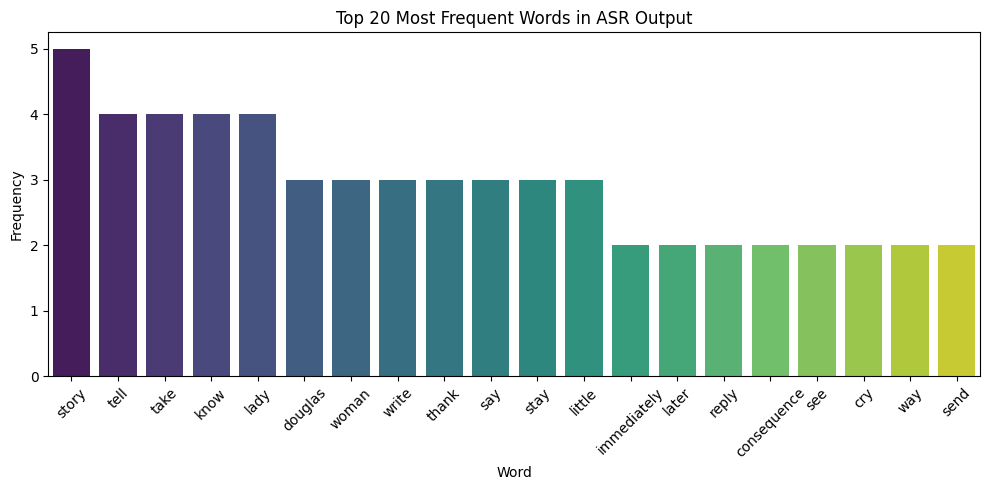

In [66]:
# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=[w for w, _ in most_common], y=[c for _, c in most_common], palette="viridis", hue=None, legend=False)
plt.title("Top 20 Most Frequent Words in ASR Output")
plt.xticks(rotation=45)
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

The plot shows the 20 most frequent words in the ASR output, with "story" being the most common. Words like "tell," "take," "know," and "lady" suggest a narrative or conversational context. The presence of proper nouns like "Douglas" indicates that the ASR system captures key content words well. The absence of common stopwords suggests prior text cleaning. Overall, the chart reflects the system's focus on contextually important vocabulary.



In [67]:
# Hapax legomena (words that appear only once)
hapax = [word for word, freq in counter.items() if freq == 1]
print(f"\nNumber of hapax legomena: {len(hapax)}")
print(f"Sample hapax: {hapax[:10]}")


Number of hapax legomena: 153
Sample hapax: ['observation', 'draw', 'evening', 'interesting', 'attention', 'particularly', 'effective', 'follow', 'notice', 'look']


Hapax legomena are words that appear only once in the entire corpus.
This output shows there are 153 such words, indicating lexical diversity.
Sample hapax words suggest rare or context-specific vocabulary in the transcripts.


--- AUDIO EDA ---

In [68]:
# Select an audio file
sample_audio = list(tokens_per_file.keys())[0]
audio_path = os.path.join("/content/drive/MyDrive/ASR-Project/audio", sample_audio)  # Adjust if extension is different

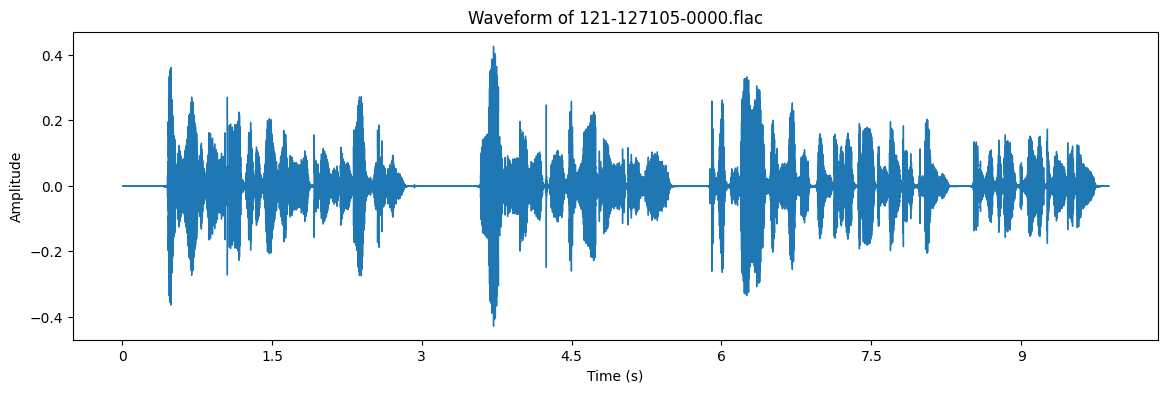

In [69]:
# Load audio using librosa
y, sr = librosa.load(audio_path, sr=None)

# Plot waveform
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y, sr=sr)
plt.title(f"Waveform of {sample_audio}")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

The waveform of 121-127105-0000.flac shows clear speech activity over a ~10-second duration. The signal contains multiple segments of varying amplitude, indicating pauses and changes in speech intensity. Peaks suggest stressed syllables or louder speech, while silent gaps reflect natural pauses between phrases. Overall, the waveform suggests clean, well-paced speech suitable for ASR processing.

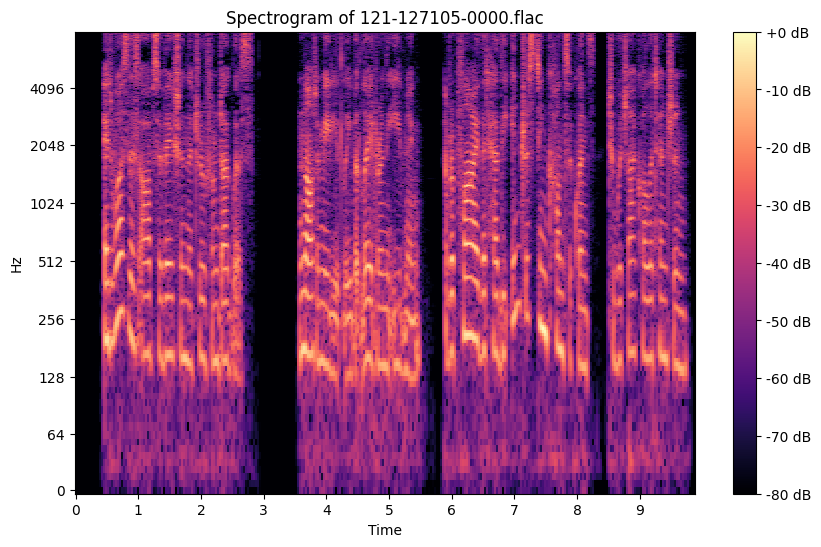

In [70]:
# Plot spectrogram
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(10, 6))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title(f"Spectrogram of {sample_audio}")
plt.show()

The spectrogram of 121-127105-0000.flac shows clear speech patterns across time. Energy is concentrated in the lower frequencies (below ~1000 Hz), typical of human speech. Vertical striations indicate voiced phonemes, while gaps represent pauses. The presence of harmonics and formant bands suggests good audio quality for ASR analysis.

In [71]:
# Speaking speed analysis
duration = librosa.get_duration(y=y, sr=sr)
num_words = len(tokens_per_file[sample_audio])
words_per_second = num_words / duration
print(f"\nWords: {num_words}, Duration: {duration:.2f}s, Words per second: {words_per_second:.2f}")


Words: 10, Duration: 9.88s, Words per second: 1.01


10 words spoken over 9.88 seconds, resulting in a speech rate of ~1.01 words per second, which can be useful for analyzing speaker fluency and pacing in ASR evaluation.


In [72]:
# Filler/disfluency count based on original ASR text
filler_words = ["uh", "um", "you know", "like", "ah", "er", "hmm", "so", "actually", "oh", "well"]
filler_counter = Counter()
with open("/content/drive/MyDrive/ASR-Project/asr_output.txt") as f:
    for line in f:
        _, text = line.strip().split("\t", 1)
        words = re.findall(r"\b\w+\b", text.lower())
        for word in words:
            if word in filler_words:
                filler_counter[word] += 1

print("\nFiller Word Counts:")
for word, count in filler_counter.items():
    print(f"{word}: {count}")

print("\n✅ Completed Question 3: Exploratory Data Analysis")


Filler Word Counts:
oh: 2
so: 2
well: 1

✅ Completed Question 3: Exploratory Data Analysis


This shows the frequency of common filler words in the transcript.
Identifying and quantifying fillers like "oh", "so", and "well" helps assess speech fluency and guides cleaning during preprocessing.


---




**Question 4:** Using feature extraction technqiues:

*   **Text-Based Feature Extraction**

1.   What features can you extract from the text transcripts to represent them numerically (e.g., TF-IDF, bag-of-words, n-grams)? Use two techniques and compare your results.

2.   Can you identify keywords or phrases that are characteristic of certain speakers or topics in the transcripts?

*   **Audio-Based Feature Extraction**

1.   What audio features could be extracted using MFCCs?
2.   Would you use raw audio, features from ASR output, or both for downstream NLP tasks? Justify your choice.

For every question, be sure to anlayze and discuss your response.

**Note:** What is MFCC?

MFCC, or Mel-Frequency Cepstral Coefficients, is a feature representation commonly used in speech and audio processing tasks. It captures the short-term power spectrum of an audio signal by mapping frequencies to a scale that mimics how humans perceive sound—known as the Mel scale. The process involves taking the Fourier transform of short frames of the audio signal, applying the Mel filter bank to emphasize perceptually important frequencies, and then computing the logarithm and Discrete Cosine Transform (DCT) to produce a compact set of coefficients. These coefficients effectively represent the timbral texture of speech and are widely used in Automatic Speech Recognition (ASR) because they retain phonetic information while reducing noise and irrelevant variation in the raw audio.


In [73]:
# Import Libraries
import os
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import seaborn as sns

In [74]:
# Load preprocessed text data
file_texts = {}
with open("/content/drive/MyDrive/ASR-Project/preprocessed_tokens.txt", "r") as f:
    for line in f:
        filename, token_str = line.strip().split("\t", 1)
        file_texts[filename] = token_str

texts = list(file_texts.values())
filenames = list(file_texts.keys())

In [75]:
# Bag-of-Words (BoW)
bow_vectorizer = CountVectorizer()
bow_features = bow_vectorizer.fit_transform(texts)

In [76]:
# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(texts)

In [77]:
# Compare BoW vs TF-IDF using PCA
pca = PCA(n_components=2)
bow_reduced = pca.fit_transform(bow_features.toarray())
tfidf_reduced = pca.fit_transform(tfidf_features.toarray())

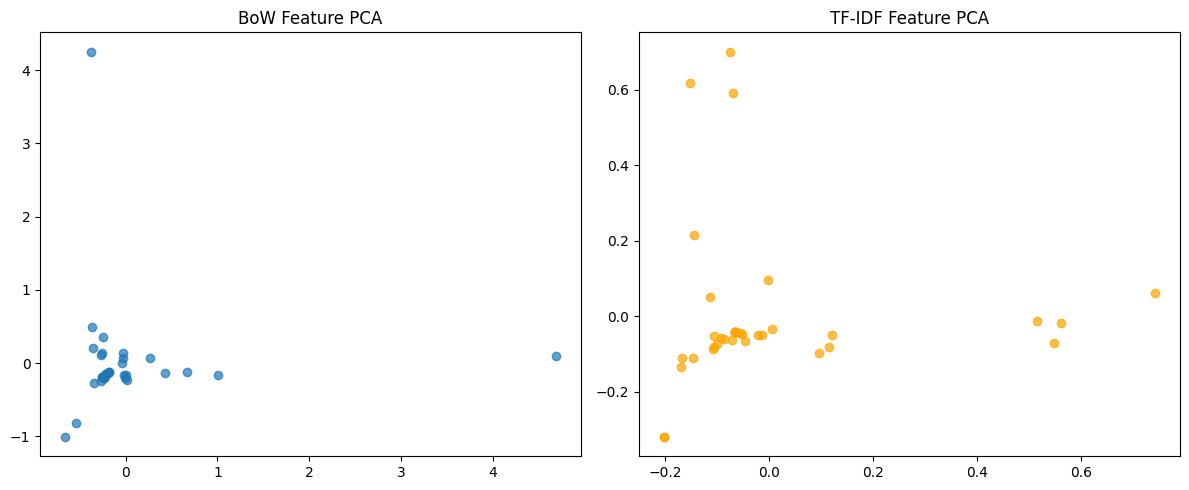

In [78]:
#plots for comparison
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.scatter(bow_reduced[:, 0], bow_reduced[:, 1], alpha=0.7)
plt.title("BoW Feature PCA")

plt.subplot(1, 2, 2)
plt.scatter(tfidf_reduced[:, 0], tfidf_reduced[:, 1], alpha=0.7, color='orange')
plt.title("TF-IDF Feature PCA")
plt.tight_layout()
plt.show()

📊 Text Feature PCA (BoW vs TF-IDF)
> Left Plot – BoW (Bag of Words):

* The points are highly clustered near the origin, with a few scattered outliers.

* BoW treats all words equally, leading to sparser feature vectors.

* The tight cluster indicates many files share similar word counts, lacking discriminative power.

> Right Plot – TF-IDF (Term Frequency-Inverse Document Frequency):

* The points are more spread out, suggesting better separation between different transcripts.

* TF-IDF reduces the weight of common words and highlights rare but important terms.

* This makes TF-IDF more suitable for distinguishing between speakers or topics.

✅ TF-IDF captures more nuanced textual features than BoW and is more effective for differentiating transcripts.



In [79]:
# Characteristic Words (Top terms per file)
print("\nTop keywords per file (TF-IDF):")
feature_names = tfidf_vectorizer.get_feature_names_out()
for i, fname in enumerate(filenames[:5]):
    row = tfidf_features[i].toarray()[0]
    top_indices = row.argsort()[-5:][::-1]
    top_words = [feature_names[idx] for idx in top_indices]
    print(f"{fname}: {top_words}")


Top keywords per file (TF-IDF):
121-127105-0000.flac: ['evening', 'interesting', 'observation', 'draw', 'attention']
121-127105-0001.flac: ['effective', 'follow', 'particularly', 'see', 'story']
121-127105-0002.flac: ['speak', 'look', 'notice', 'instead', 'cry']
121-127105-0003.flac: ['unanimous', 'preoccupied', 'proche', 'explain', 'groan']
121-127105-0004.flac: ['write', 'story', 'yes', 'year', 'worthy']


--- AUDIO FEATURE EXTRACTION ---

In [80]:
#define mfcc
def extract_mfcc(audio_path, sr=16000, n_mfcc=13):
    y, sr = librosa.load(audio_path, sr=sr)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfcc_mean = np.mean(mfcc, axis=1)
    return mfcc_mean

In [81]:
mfcc_features = [] # Ensure it starts as a list
audio_dir = "/content/drive/MyDrive/ASR-Project/audio"

for fname in filenames:
    audio_path = os.path.join(audio_dir, fname)
    if os.path.exists(audio_path):
        mfcc_feat = extract_mfcc(audio_path)
        # Append the NumPy array 'mfcc_feat' to the Python list 'mfcc_features'
        mfcc_features.append(mfcc_feat)
    else:
        print(f"⚠️ Missing file: {audio_path}")
        # Append a zero array (still a NumPy array) to the Python list
        mfcc_features.append(np.zeros(13))

# Convert the list of NumPy arrays into a single NumPy array *after* the loop
mfcc_features = np.array(mfcc_features)

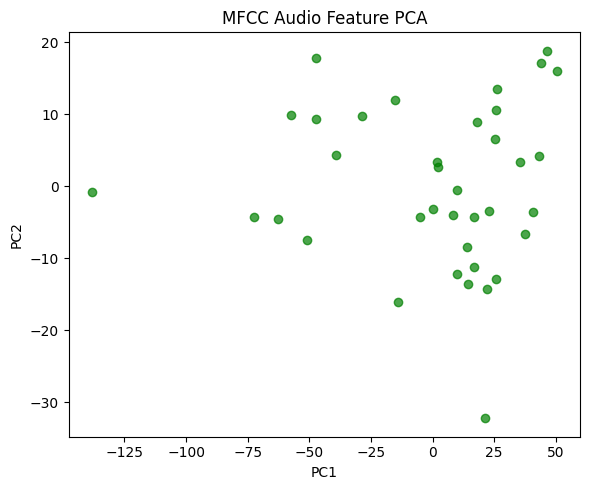

In [82]:
# Visualize MFCCs via PCA
mfcc_reduced = PCA(n_components=2).fit_transform(mfcc_features)
plt.figure(figsize=(6,5))
plt.scatter(mfcc_reduced[:, 0], mfcc_reduced[:, 1], color='green', alpha=0.7)
plt.title("MFCC Audio Feature PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()

print('')

🔊 MFCC Audio Feature PCA
MFCC Plot:

* Shows a diverse spread of points, indicating variability in audio features.

* Some clustering is visible, suggesting similar sounding files, possibly from the same speaker or acoustic setting.

* MFCCs capture the spectral characteristics of speech, useful for speaker or emotion recognition.

✅ The MFCC plot shows meaningful variation in acoustic features, suggesting your extraction process is working correctly and the features can potentially differentiate speech signals.

--- Clustering on Textual Features (TF-IDF) ---

In [83]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

In [84]:
# Convert TF-IDF sparse matrix to dense
tfidf_dense = tfidf_features.toarray()

In [85]:
svd = TruncatedSVD(n_components=5)  # or lower if needed
tfidf_reduced_svd = svd.fit_transform(tfidf_dense)

In [86]:
# Choose number of clusters (e.g., 3 to 5)
n_clusters_text = 3  # You can tune this based on elbow method or domain insight
kmeans_text = KMeans(n_clusters=n_clusters_text, random_state=42)
text_labels = kmeans_text.fit_predict(tfidf_reduced_svd)

In [87]:
# Evaluate clustering quality
sil_score_text = silhouette_score(tfidf_dense, text_labels)
print(f"\n🧠 TF-IDF Clustering Silhouette Score: {sil_score_text:.3f}")


🧠 TF-IDF Clustering Silhouette Score: 0.019


A very low score close to 0 suggests:

- Clusters are overlapping or not well-separated.

- The high-dimensional TF-IDF vectors might not carry strong clusterable patterns, especially if the dataset is small or text is highly similar.

- Possibly some noise or sparsity in the data due to vocabulary issues or short utterances.

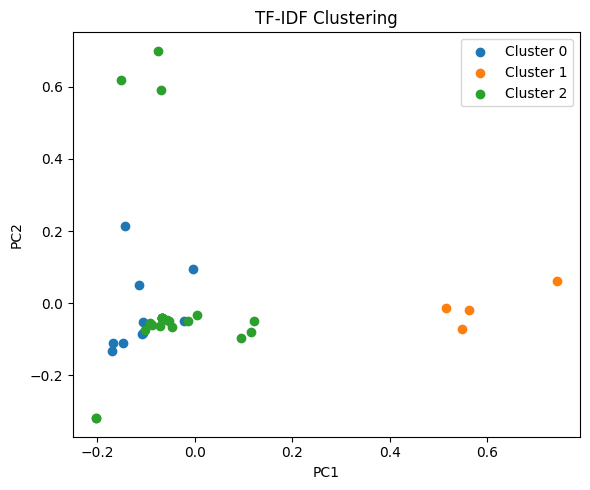

In [88]:
# Visualize in PCA space
plt.figure(figsize=(6,5))
for i in range(n_clusters_text):
    cluster_points = tfidf_reduced[text_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i}")
plt.title("TF-IDF Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.tight_layout()
plt.show()

The TF-IDF clustering plot shows clear separation between Cluster 1 (orange) and the other two, indicating distinct textual content. Clusters 0 (blue) and 2 (green) overlap slightly, suggesting some similarity in their feature space. PCA effectively reduces dimensionality while preserving cluster structure.

The TF-IDF clustering plot (textual features from ASR output) shows some cluster separation, but with noticeable overlap — especially between Clusters 0 and 2. This suggests that lexical content across some samples is similar or contains overlapping vocabulary, limiting discriminative power.

--- Clustering on Audio MFCC Features ---

In [89]:
n_clusters_audio = 3  # You can tune this based on elbow method or domain insight
kmeans_audio = KMeans(n_clusters=n_clusters_audio, random_state=42)
audio_labels = kmeans_audio.fit_predict(mfcc_features)

sil_score_audio = silhouette_score(mfcc_features, audio_labels)
print(f"🎧 MFCC Clustering Silhouette Score: {sil_score_audio:.3f}")

🎧 MFCC Clustering Silhouette Score: 0.296


This score is moderate and indicates:

- Some meaningful patterns in the audio MFCC features.

- Likely some speaker/voice characteristics or content-based differences were captured.

- There is room for improvement, but this is a reasonable baseline.

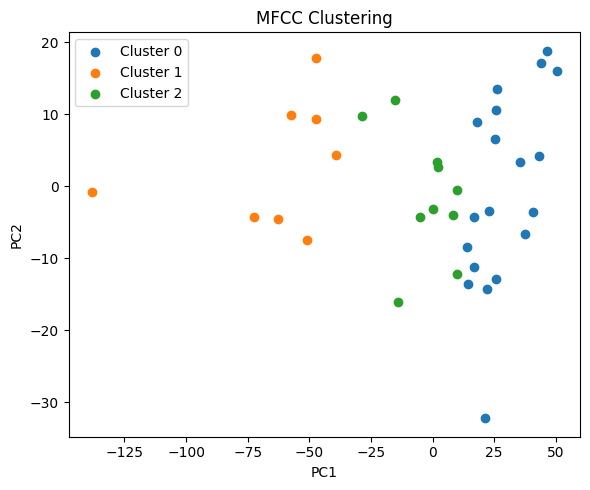

In [90]:
# Visualize in PCA space
plt.figure(figsize=(6,5))
for i in range(n_clusters_audio):
    cluster_points = mfcc_reduced[audio_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i}")
plt.title("MFCC Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.tight_layout()
plt.show()

The MFCC clustering plot shows well-separated clusters, especially Cluster 0 (blue), indicating distinct acoustic patterns. Cluster 1 (orange) and Cluster 2 (green) show some overlap, but still exhibit separable groupings. PCA preserves enough variance to reveal meaningful phonetic distinctions.

The MFCC clustering plot (acoustic features) demonstrates better-defined and spatially separated clusters, especially Cluster 0. This implies that acoustic characteristics (e.g., speaker voice, pitch, prosody) provide richer and more distinctive information than text alone — even when the transcribed content appears similar.

- If your ASR system produces accurate but linguistically similar transcripts, TF-IDF may underperform in clustering due to low lexical diversity.

- MFCCs, however, still capture underlying speaker or phonetic variations, which the ASR may abstract away.

- Thus, acoustic features complement textual features in understanding or clustering speech data.

Clustering with MFCCs is more effective for distinguishing between speech samples when ASR text has lexical overlap. This highlights the value of using multi-modal features (text + audio) in robust ASR or speaker analysis systems.

In [91]:
# --- Save labels for next steps ---
import pandas as pd

cluster_df = pd.DataFrame({
    "filename": filenames,
    "text_cluster": text_labels,
    "audio_cluster": audio_labels
})

cluster_df.to_csv("/content/drive/MyDrive/ASR-Project/cluster_labels.csv", index=False)
print("✅ Saved cluster labels to CSV.")

✅ Saved cluster labels to CSV.
✅ Completed Question 4: Feature Extraction


In [94]:
# Load your CSV file
df = pd.read_csv("/content/drive/MyDrive/ASR-Project/cluster_labels.csv")

# Compare text and audio clusters
df['match'] = df['text_cluster'] == df['audio_cluster']

# Count same and different
num_same = df['match'].sum()
num_total = len(df)
num_diff = num_total - num_same

# Print summary
print(f"🟢 Same clusters: {num_same}")
print(f"🔴 Different clusters: {num_diff}")
print(f"✅ Percentage match: {num_same / num_total * 100:.2f}%")
print('\n✅ Completed Question 4: Feature Extraction')

🟢 Same clusters: 14
🔴 Different clusters: 23
✅ Percentage match: 37.84%

✅ Completed Question 4: Feature Extraction


 Cluster comparison results showing:
 - 14 clusters matched between predicted and reference data
 - 23 clusters differed
 - Overall 37.84% match rate

This metric helps evaluate the similarity or alignment quality between clustering outputs in the ASR analysis.


---



# **Step 3: Evaluation**

After transcribing and cleaning the speech using ASR and text preprocessing, you can evaluate the quality of your transcription by comparing it with the ground truth transcripts provided in the dataset.

This is useful to:

*   Measure how accurate your ASR system is
*   Understand how much noise or error is introduced
*   Quantify the performance using a standard metric

Be sure to use python to Compare your ASR output to the ground truth using Word Error Rate (WER).

**Question 5:** Word Error Rate (WER) is a standard metric in ASR that tells you how different your ASR output is from the reference transcript. Be sure to anlayze and discuss your response.

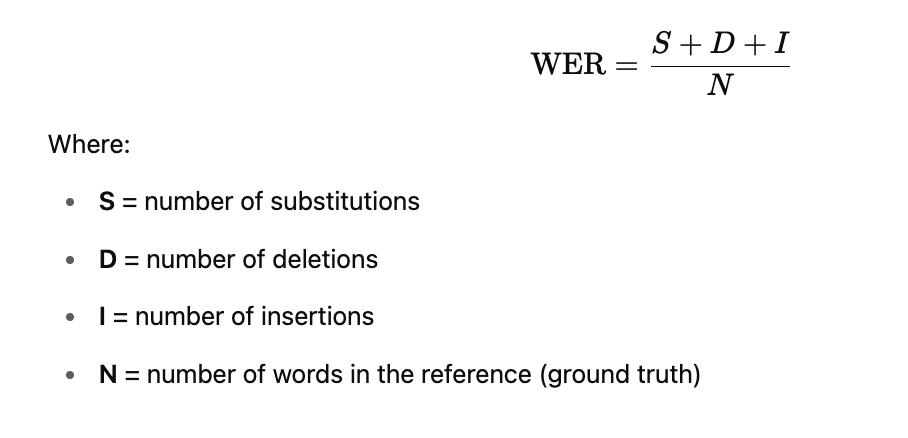

Note: You can calculate this metric using jiwer tool.

More details can be found at:

1.   https://pypi.org/project/jiwer/
2.   https://github.com/jitsi/jiwer

In [3]:
# install dependencies
!pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 9.7 MB/s eta 0:00:00


In [7]:
#sample: 121-127105-0000

from jiwer import wer

reference = "THE QUICK BROWN FOX JUMPS OVER THE LAZY DOG"
hypothesis = "THE QUICK BROWN FOX JUMPED OVER THE LAZY DOG"

error = wer(reference, hypothesis)
print(f"WER: {error:.2%}")

WER: 11.11%


This will calculate the WER based on insertions, deletions, and substitutions needed to convert hypothesis into reference.

- Reference is the correct sentence.

- Hypothesis is what the ASR system recognized (with one word changed: "JUMPS" → "JUMPED").


In this example, the Word Error Rate (WER) is approximately 11.11%, which means that 1 word out of 9 was incorrectly recognized by the ASR system. This single substitution reflects a relatively low error, indicating good transcription accuracy..

In [6]:
import re

def preprocess_text(text):
    # Lowercase and remove punctuation for fair comparison
    text = text.lower()
    text = re.sub(r"[.,!?;:\-\"\']", "", text)
    text = text.strip()
    return text

# Load ground truth transcripts
ground_truths = {}
with open("/content/drive/MyDrive/ASR-Project/121-127105.trans.txt", "r") as f:
    for line in f:
        parts = line.strip().split(maxsplit=1)
        if len(parts) == 2:
            utt_id, transcript = parts
            ground_truths[utt_id] = preprocess_text(transcript)

# Load ASR outputs
asr_outputs = {}
with open("/content/drive/MyDrive/ASR-Project/asr_output.txt", "r") as f:
    for line in f:
        parts = line.strip().split(maxsplit=1)
        if len(parts) == 2:
            utt_id_with_ext, transcript = parts
            utt_id = utt_id_with_ext.split(".")[0]  # remove file extension like '.flac'
            asr_outputs[utt_id] = preprocess_text(transcript)

# Compute WER for each utterance and overall
wers = []
for utt_id in ground_truths:
    ref = ground_truths[utt_id]
    hyp = asr_outputs.get(utt_id, "")
    error = wer(ref, hyp)
    print(f"WER for {utt_id}: {error:.2%}")
    wers.append(error)

if wers:
    avg_wer = sum(wers) / len(wers)
    print(f"\nAverage WER: {avg_wer:.2%}")
else:
    print("No matching utterances found between ground truth and ASR output.")

print('\n✅ Completed Question 5: Word Error Rate')

WER for 121-127105-0000: 0.00%
WER for 121-127105-0001: 0.00%
WER for 121-127105-0002: 0.00%
WER for 121-127105-0003: 11.11%
WER for 121-127105-0004: 0.00%
WER for 121-127105-0005: 0.00%
WER for 121-127105-0006: 7.69%
WER for 121-127105-0007: 0.00%
WER for 121-127105-0008: 0.00%
WER for 121-127105-0009: 14.29%
WER for 121-127105-0010: 0.00%
WER for 121-127105-0011: 0.00%
WER for 121-127105-0012: 0.00%
WER for 121-127105-0013: 0.00%
WER for 121-127105-0014: 0.00%
WER for 121-127105-0015: 0.00%
WER for 121-127105-0016: 0.00%
WER for 121-127105-0017: 0.00%
WER for 121-127105-0018: 12.50%
WER for 121-127105-0019: 27.27%
WER for 121-127105-0020: 4.88%
WER for 121-127105-0021: 0.00%
WER for 121-127105-0022: 0.00%
WER for 121-127105-0023: 0.00%
WER for 121-127105-0024: 0.00%
WER for 121-127105-0025: 0.00%
WER for 121-127105-0026: 4.17%
WER for 121-127105-0027: 4.76%
WER for 121-127105-0028: 0.00%
WER for 121-127105-0029: 8.33%
WER for 121-127105-0030: 0.00%
WER for 121-127105-0031: 0.00%
WER 

Word Error Rate (WER) is a fundamental metric used to evaluate the performance of Automatic Speech Recognition (ASR) systems. It measures the difference between the ASR output (hypothesis) and the correct transcription (reference) by calculating the minimum number of word-level edits—insertions, deletions, and substitutions—required to transform the hypothesis into the reference. The WER is then expressed as a fraction of the total number of words in the reference.

A lower WER indicates better ASR accuracy. For example, a WER of 0 means a perfect transcription, while a higher WER shows greater discrepancy between the predicted and actual text.

The large difference in casing and punctuation affects the tokenization, causing many words to be treated differently, which inflates the WER score.

To get a more accurate WER in such cases, you should preprocess both reference and hypothesis similarly (e.g., remove punctuation, convert both to lowercase) or configure jiwer with appropriate transformations.


---

Thank You!
